# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

REASONING
(Assumption: Pages form a directed graph similar to the internet nx.DiGraph())
- When it comes to the absorbing graph, the page rank algorithm seems to work correctly, but with an issue. This issue is the fact that when we run the algorithm. We will not visit some pages, as some pages do not have outgoing links (edges). Having these "dangling" nodes makes it so we do not explore the full network.
- When it comes to the components graph, the page rank algorithm seems to also work correctly but with an issue. The issue is not "dangling" links but having 2 disconnected graphs. Because we have a cyclical graphs where we can visit each page of the subgraph, but never all pages in the graph.
- For both graphs with the base random surfer model we have unexplored pages with page rank 0.

#### Exercise 2.12

Page rank for the absorbing graph: ['Node 0: 0.0', 'Node 1: 1.0', 'Node 2: 0.0', 'Node 3: 0.0', 'Node 4: 0.0']
Finished at iteration: 1
Page rank for the components graph: ['Node 0: 0.0', 'Node 1: 0.0', 'Node 2: 0.0', 'Node 3: 0.0', 'Node 4: 0.285', 'Node 5: 0.144', 'Node 6: 0.285', 'Node 7: 0.285']
Finished at iteration: 10000


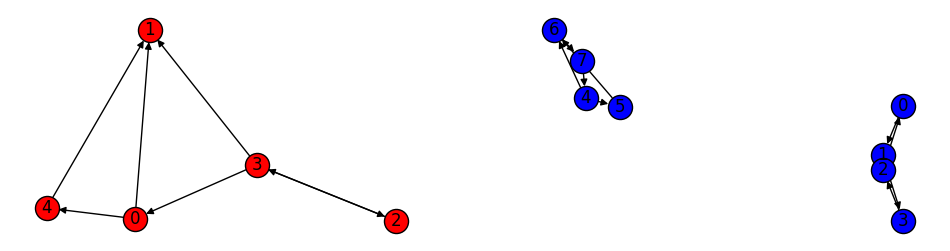

Reasoning in the markdown cell above.


In [138]:
# read the graphs from .graph files
AG = nx.read_adjlist('../data/absorbing.graph', create_using=nx.DiGraph())
CG = nx.read_adjlist('../data/components.graph', create_using=nx.DiGraph())

# print the number of nodes and edges
# print('Absorbing graph has {} nodes and {} edges'.format(AG.number_of_nodes(), AG.number_of_edges()))
# print('Components graph has {} nodes and {} edges'.format(CG.number_of_nodes(), CG.number_of_edges()))

def PR(G):
    it = 0

    # pages_rank for the absorbing graph
    page_rank = [0 for i in range(G.number_of_nodes())]

    # pick a ranonm node from the absorbing graph
    starting_node = np.random.choice(G.nodes())
    page_rank[int(starting_node)] += 1

    for _ in range(10000):
        it += 1
        # Other nodes
        outgoing_nodes = list(G.neighbors(starting_node))

        # Dangling node
        if len(outgoing_nodes) == 0:
            break

        # uniform distribution
        uniform_distribution = [1/len(outgoing_nodes) for i in range(len(outgoing_nodes))]

        # Pick uniformly at random from the other nodes
        next_node = np.random.choice(outgoing_nodes, p=uniform_distribution)
        # update the page rank
        page_rank[int(next_node)] += 1

        # Start node update
        starting_node = next_node

    # normalize the page rank
    page_rank = [round(i/sum(page_rank), 3) for i in page_rank]
    return page_rank, it

# page rank for the absorbing graph
page_rank_ag, iter_ag = PR(AG)
print('Page rank for the absorbing graph: {}'.format([f"Node {i}: {page_rank_ag[i]}" for i in range(len(page_rank_ag))]))
print('Finished at iteration: {}'.format(iter_ag))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
nx.draw(AG, pos=nx.spring_layout(AG, seed=100), edgecolors="black", node_color="red", edge_color="black", with_labels=True)


# page rank for the components graph
page_rank_cg, iter_cg = PR(CG)
print('Page rank for the components graph: {}'.format([f"Node {i}: {page_rank_cg[i]}" for i in range(len(page_rank_cg))]))
print('Finished at iteration: {}'.format(iter_cg))
plt.subplot(1, 2, 2)
nx.draw(CG, pos=nx.spring_layout(CG, seed=100), edgecolors="black", node_color="blue", edge_color="black", with_labels=True)
plt.show()

print("Reasoning in the markdown cell above.")


#### Exercise 2.13

REASONING
- For both graphs we have a successful page rank algorithm execution as we discover all pages and have a page rank for each page. By implementing the two changes we solved the issue of dangling nodes and disconnected graphs.

In [139]:
def PR_updated(G):
    it = 0

    # Damping factor
    tau = 0.15

    # pages_rank for the absorbing graph
    page_rank = [0 for i in range(G.number_of_nodes())]

    # pick a ranonm node from the absorbing graph
    starting_node = np.random.choice(G.nodes())
    page_rank[int(starting_node)] += 1

    for _ in range(10000):
        it += 1
        
        # Apply damping
        r = random.random()
        if r >= tau:
            starting_node = np.random.choice(G.nodes())

        # Other nodes
        outgoing_nodes = list(G.neighbors(starting_node))

        # Dangling node
        if len(outgoing_nodes) == 0:
            starting_node = np.random.choice(G.nodes())
            continue

        # Pick uniformly at random from the other nodes
        next_node = np.random.choice(outgoing_nodes)
        # update the page rank
        page_rank[int(next_node)] += 1

        # Start node update
        starting_node = next_node

    # normalize the page rank
    page_rank = [round(i/sum(page_rank), 3) for i in page_rank]
    return page_rank, it

page_rank_ag, iter_ag = PR_updated(AG)
print('Page rank for the absorbing graph: {}'.format([f"Node {i}: {page_rank_ag[i]}" for i in range(len(page_rank_ag))]))
print('Finished at iteration: {}'.format(iter_ag))

page_rank_cg, iter_cg = PR_updated(CG)
print('Page rank for the components graph: {}'.format([f"Node {i}: {page_rank_cg[i]}" for i in range(len(page_rank_cg))]))
print('Finished at iteration: {}'.format(iter_cg))

print("Reasoning in the markdown cell above.")

Page rank for the absorbing graph: ['Node 0: 0.084', 'Node 1: 0.464', 'Node 2: 0.091', 'Node 3: 0.238', 'Node 4: 0.124']
Finished at iteration: 10000
Page rank for the components graph: ['Node 0: 0.13', 'Node 1: 0.125', 'Node 2: 0.178', 'Node 3: 0.062', 'Node 4: 0.123', 'Node 5: 0.065', 'Node 6: 0.183', 'Node 7: 0.134']
Finished at iteration: 10000
Reasoning in the markdown cell above.


---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [154]:
# Load the data
wikipedia = nx.read_adjlist('../data/wikipedia.graph', create_using=nx.DiGraph())
print('Wikipedia graph has {} nodes and {} edges'.format(wikipedia.number_of_nodes(), wikipedia.number_of_edges()))

# Create the random walk matrix
M = np.ndarray(shape=(wikipedia.number_of_nodes(), wikipedia.number_of_nodes()), dtype=float)

# Read the titles of the nodes
labels = pd.read_csv('../data/wikipedia_titles.tsv', sep='\t')

# Random walk matrix
for i, node_i in enumerate(wikipedia.nodes()):
    for j, node_j in enumerate(wikipedia.nodes()):
        if wikipedia.has_edge(node_i, node_j):
            M[i][j] = 1/len(list(wikipedia.neighbors(node_i)))
        else:
            M[i][j] = 0

N = wikipedia.number_of_nodes()
pi = np.ones(N)/N
tau = 1 - 0.15

G = (tau * M) + ((1 - tau) * (1/N))

# Page rank
for _ in range(100):
    pi = np.matmul(G, pi)
    pi = pi / np.linalg.norm(pi)

x = np.argsort(pi)[::-1][:10]
print("Indices that have the highest page rank:",x)
for i, index in enumerate(x):
    print("Page rank: {} - {}".format(i+1, labels.iloc[index][1]))

Wikipedia graph has 5540 nodes and 197056 edges
Indices that have the highest page rank: [5398 4835 2831 4850 2618 4581   27 3245 4456 4579]
Page rank: 1 - Wheel
Page rank: 2 - Svalbard
Page rank: 3 - John Flamsteed
Page rank: 4 - Sydney Opera House
Page rank: 5 - Independent school (UK)
Page rank: 6 - Six Nations Championship
Page rank: 7 - 1765
Page rank: 8 - Maputo
Page rank: 9 - São Tomé
Page rank: 10 - Sistine Chapel ceiling


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*

In [168]:
index_of_history_of_mathematics = 2463

wikipedia = nx.read_adjlist('../data/wikipedia.graph', create_using=nx.DiGraph())


# Add an edge from every node to the history of mathematics
wikipedia.add_edges_from([(5169, index_of_history_of_mathematics) for i in wikipedia.nodes()])

In [167]:
# Load the data
print('Wikipedia graph has {} nodes and {} edges'.format(wikipedia.number_of_nodes(), wikipedia.number_of_edges()))

# Create the random walk matrix
M = np.ndarray(shape=(wikipedia.number_of_nodes(), wikipedia.number_of_nodes()), dtype=float)

# Read the titles of the nodes
labels = pd.read_csv('../data/wikipedia_titles.tsv', sep='\t')

# Random walk matrix
for i, node_i in enumerate(wikipedia.nodes()):
    for j, node_j in enumerate(wikipedia.nodes()):
        if wikipedia.has_edge(node_i, node_j):
            M[i][j] = 1/len(list(wikipedia.neighbors(node_i)))
        else:
            M[i][j] = 0

N = wikipedia.number_of_nodes()
pi = np.ones(N)/N
tau = 1 - 0.15

G = (tau * M) + ((1 - tau) * (1/N))

# Page rank
for _ in range(100):
    pi = np.matmul(G, pi)
    pi = pi / np.linalg.norm(pi)

x = np.argsort(pi)[::-1][:10]
print("Indices that have the highest page rank:",x)
for i, index in enumerate(x):
    print("Page rank: {} - {}".format(i+1, labels.iloc[index][1]))

Wikipedia graph has 5542 nodes and 197057 edges
Indices that have the highest page rank: [5398 4835 2831 4850 2618 4581   27 3245 4456 4579]
Page rank: 1 - Wheel
Page rank: 2 - Svalbard
Page rank: 3 - John Flamsteed
Page rank: 4 - Sydney Opera House
Page rank: 5 - Independent school (UK)
Page rank: 6 - Six Nations Championship
Page rank: 7 - 1765
Page rank: 8 - Maputo
Page rank: 9 - São Tomé
Page rank: 10 - Sistine Chapel ceiling
